In [1]:
import os
import re
import mdtraj as md
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.decomposition import PCA

In [13]:
def plot_potential_energy(md_platform, state_file_list, plot_type, window, title):
    energy_arrays = []
    labels = []
    for i, state_file in enumerate(state_file_list):
        if md_platform == 'openmm':
            df = pd.read_csv(state_file)
        elif md_platform == 'gromacs':
            csv_file = os.path.splitext(state_file)[0] + '.csv'
            with open(state_file, 'r') as fin, open(csv_file, 'w') as fout:
                for line in fin:
                    if not (line.startswith('@') or line.startswith('#')):
                        fout.write(','.join(line.split()) + '\n')
            #df = pd.read_csv(csv_file, header=None) #ignore the first row as initial state
            df = pd.read_csv(csv_file)
            df.columns = ['time', 'Potential Energy (kJ/mole)']
        energy = df['Potential Energy (kJ/mole)'].to_numpy()
        n_windows = len(energy) // window
        avg_energy = np.array([energy[i*window:(i+1)*window].mean() for i in range(n_windows)])
        avg_frames = np.arange(n_windows) * window
        energy_arrays.append(avg_energy)
        #labels.append(f'replicate {i+1}')
        labels = ['300K NPT', '400K NPT', '500K NPT']
        if plot_type == 'line':
            #plt.plot(avg_frames, avg_energy, label=labels[-1])
            plt.plot(avg_frames, avg_energy, label=labels[i])
            plt.xlabel('Frames')
            plt.ylabel('Potential Energy (kJ/mole)')
            plt.title(f'Potential Energy Over Time (Window = {window} frames)')
            #plt.ylim(np.mean(energy) - 5*np.std(energy), np.mean(energy) + 5*np.std(energy))
            print(f'{labels[i]}: Mean = {np.mean(avg_energy):.2f}, Std = {np.std(avg_energy):.2f}')
        elif plot_type == 'hist':
            #sns.kdeplot(avg_energy, label=labels[-1])
            sns.kdeplot(avg_energy, label=labels[i])
            plt.xlabel('Potential Energy (kJ/mole)')
            plt.title(title)
            #plt.xlim(np.mean(energy) - 5*np.std(energy), np.mean(energy) + 5*np.std(energy))
            print(f'{labels[i]}: Mean = {np.mean(avg_energy):.2f}, Std = {np.std(avg_energy):.2f}')
    plt.grid(True)
    plt.legend()
    plt.show()
    plt.close()
    #return energy_arrays

In [14]:
def plot_total_energy(md_platform, state_file_list, plot_type, window, title):
    energy_arrays = []
    labels = []
    for i, state_file in enumerate(state_file_list):
        if md_platform == 'openmm':
            df = pd.read_csv(state_file)
        elif md_platform == 'gromacs':
            csv_file = os.path.splitext(state_file)[0] + '.csv'
            with open(state_file, 'r') as fin, open(csv_file, 'w') as fout:
                for line in fin:
                    if not (line.startswith('@') or line.startswith('#')):
                        fout.write(','.join(line.split()) + '\n')
            #df = pd.read_csv(csv_file, header=None) #ignore the first row as initial state
            df = pd.read_csv(csv_file)
            df.columns = ['time', 'Total Energy (kJ/mole)']
        energy = df['Total Energy (kJ/mole)'].to_numpy()
        n_windows = len(energy) // window
        avg_energy = np.array([energy[i*window:(i+1)*window].mean() for i in range(n_windows)])
        avg_frames = np.arange(n_windows) * window
        energy_arrays.append(avg_energy)
        #labels.append(f'replicate {i+1}')
        labels = ['300K NPT', '400K NPT', '500K NPT']
        if plot_type == 'line':
            plt.plot(avg_frames, avg_energy, label=labels[i])
            plt.xlabel('Frames')
            plt.ylabel('Total Energy (kJ/mole)')
            plt.title(f'Total Energy Over Time (Window = {window} frames)')
            #plt.ylim(np.mean(energy) - 5*np.std(energy), np.mean(energy) + 5*np.std(energy))
            print(f'{labels[i]}: Mean = {np.mean(avg_energy):.2f}, Std = {np.std(avg_energy):.2f}')
        elif plot_type == 'hist':
            sns.kdeplot(avg_energy, label=labels[i])
            plt.xlabel('Total Energy (kJ/mole)')
            plt.title(title)
            #plt.xlim(np.mean(energy) - 5*np.std(energy), np.mean(energy) + 5*np.std(energy))
            print(f'{labels[i]}: Mean = {np.mean(avg_energy):.2f}, Std = {np.std(avg_energy):.2f}')
    plt.grid(True)
    plt.legend()
    plt.show()
    plt.close()
    #return energy_arrays

300K NPT: Mean = -8825073.61, Std = 619.26
400K NPT: Mean = -8816721.99, Std = 1019.40
500K NPT: Mean = -8809105.30, Std = 1347.00


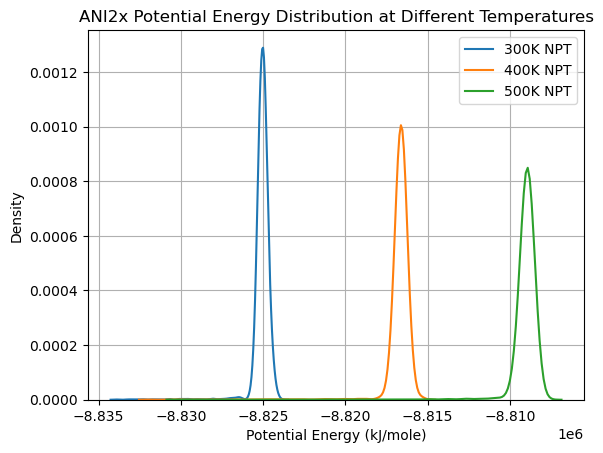

In [17]:
plot_potential_energy('openmm', ['classic/classic_ANI2x_longtime/data.csv',
                                 'classic/classic_ANI2x_longtime_400K/data.csv',
                                 'classic/classic_ANI2x_longtime_500K/data.csv'
                                 ], 'hist', 1, 'ANI2x Potential Energy Distribution at Different Temperatures')

300K NPT: Mean = -8812343.96, Std = 948.52
400K NPT: Mean = -8799710.89, Std = 1524.83
500K NPT: Mean = -8787898.74, Std = 2018.52


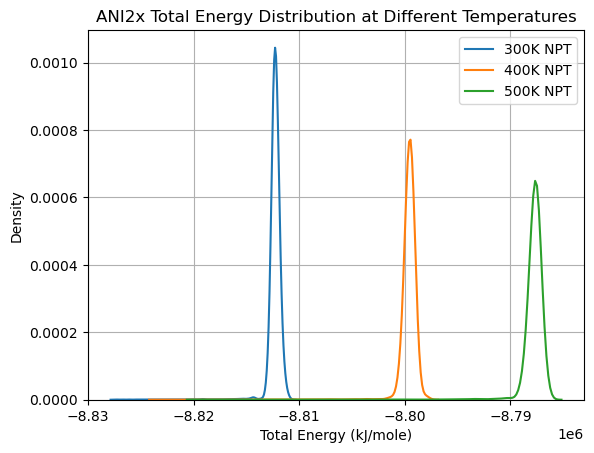

In [18]:
plot_total_energy('openmm', ['classic/classic_ANI2x_longtime/data.csv',
                                 'classic/classic_ANI2x_longtime_400K/data.csv',
                                 'classic/classic_ANI2x_longtime_500K/data.csv'
                                 ], 'hist', 1, 'ANI2x Total Energy Distribution at Different Temperatures')

300K NPT: Mean = -64616.57, Std = 258.92
400K NPT: Mean = -56270.93, Std = 338.42
500K NPT: Mean = -48435.36, Std = 408.60


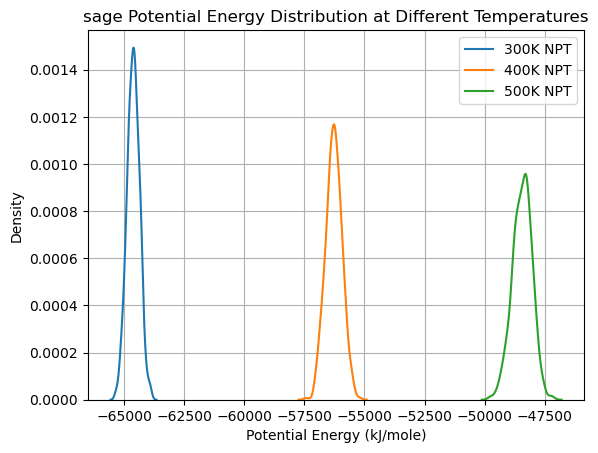

In [19]:
plot_potential_energy('openmm', ['classic/classic_sage/energy_data.csv',
                                 'classic/classic_sage_400K/energy_data.csv',
                                 'classic/classic_sage_500K/energy_data.csv'
                                 ], 'hist', 1, 'sage Potential Energy Distribution at Different Temperatures')

300K NPT: Mean = -51925.64, Std = 320.82
400K NPT: Mean = -39350.73, Std = 419.61
500K NPT: Mean = -27297.93, Std = 504.06


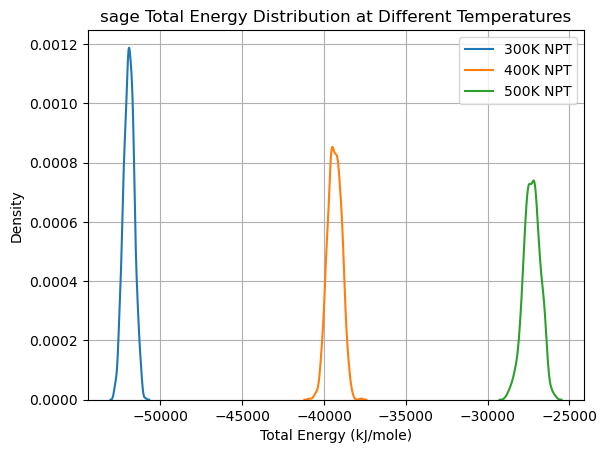

In [20]:
plot_total_energy('openmm', ['classic/classic_sage/energy_data.csv',
                                 'classic/classic_sage_400K/energy_data.csv',
                                 'classic/classic_sage_500K/energy_data.csv'
                                 ], 'hist', 1, 'sage Total Energy Distribution at Different Temperatures')

In [7]:
def plot_rmsd_fluctuations_multiple(traj_files, top_file, plot_type, window, saved_file_paths) -> md.Trajectory:
    rmsd_arrays = []
    labels = []
    for i, traj_file in enumerate(traj_files):
        traj = md.load(traj_file, top=top_file)
        try:
            traj.image_molecules(inplace=True)
        except:
            pass
        #frames = np.arange(0, traj.n_frames)
        ligand_atoms = traj.topology.select('resname UNK')
        traj.superpose(traj, frame=0, atom_indices=ligand_atoms)
        traj.save(saved_file_paths[i])
        result = traj.xyz[:, ligand_atoms, :] - traj.xyz[0, ligand_atoms, :]
        ligand_rmsd = np.sqrt((result ** 2).sum(axis=-1).mean(axis=-1))
        n_windows = len(ligand_rmsd) // window
        avg_rmsd = np.array([ligand_rmsd[i*window:(i+1)*window].mean() for i in range(n_windows)])
        avg_frames = np.arange(n_windows) * window
        rmsd_arrays.append(avg_rmsd)
        labels.append(f'replica {i+1}')
        if plot_type == 'line':
            plt.plot(avg_frames, avg_rmsd, label=labels[-1])
            plt.xlabel('Frames')
            plt.ylabel('RMSD (nm)')
            #plt.title(f'Ligand RMSD')
        elif plot_type == 'hist':
            sns.kdeplot(avg_rmsd, label=labels[-1])
            plt.xlabel('RMSD (nm)')
            plt.title('Ligand RMSD Distribution')
    plt.grid(True)
    plt.legend()
    plt.show()
    plt.close()
    return traj

dcdplugin) detected standard 32-bit DCD file of native endianness
dcdplugin) CHARMM format DCD file (also NAMD 2.1 and later)


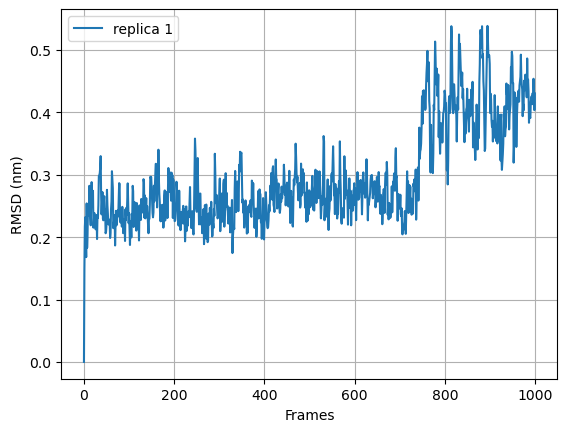

dcdplugin) detected standard 32-bit DCD file of native endianness
dcdplugin) CHARMM format DCD file (also NAMD 2.1 and later)


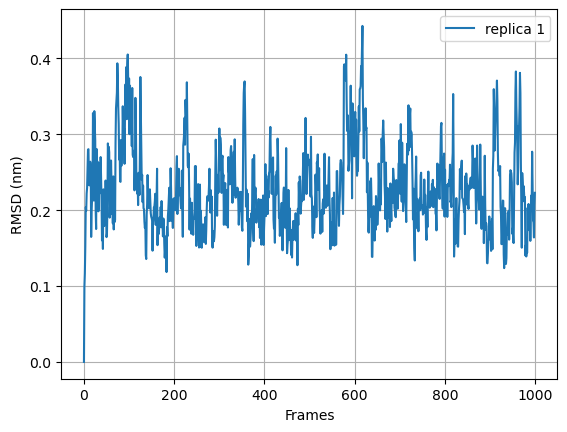

dcdplugin) detected standard 32-bit DCD file of native endianness
dcdplugin) CHARMM format DCD file (also NAMD 2.1 and later)


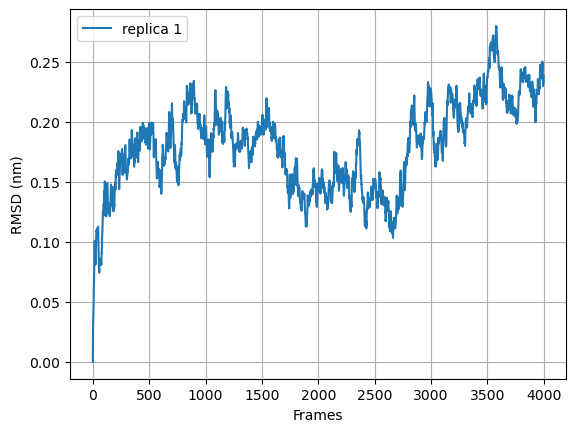

dcdplugin) detected standard 32-bit DCD file of native endianness
dcdplugin) CHARMM format DCD file (also NAMD 2.1 and later)


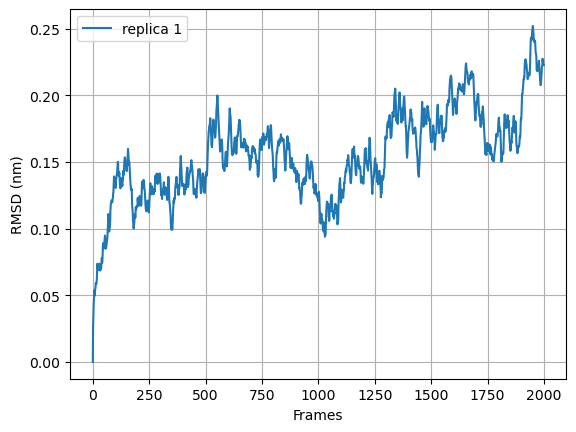

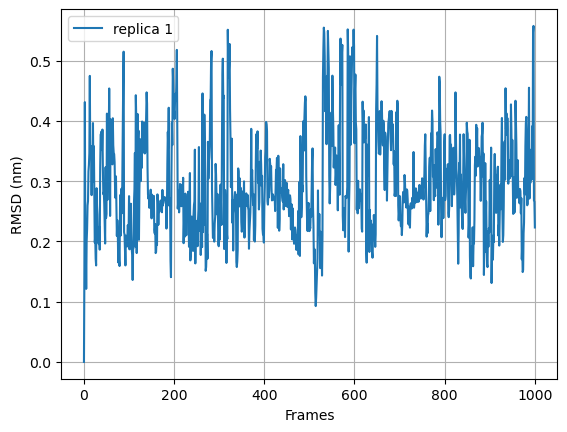

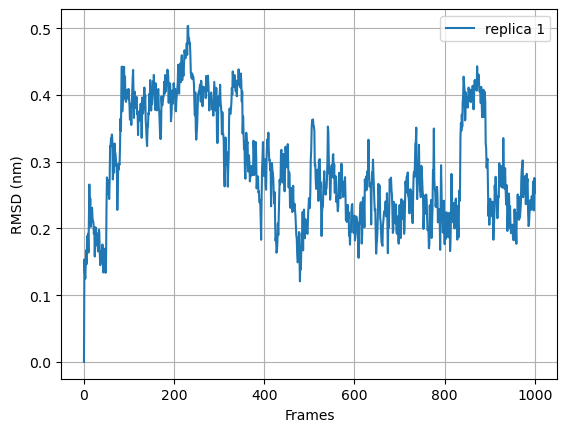

In [11]:
trj_gaff = plot_rmsd_fluctuations_multiple(['classic/classic_gaff/trajectory.dcd'], 'classic/classic_gaff/gaff_ligand_in_solvent.pdb', 'line', 1, ['classic/classic_gaff/processed.xtc'])
trj_sage = plot_rmsd_fluctuations_multiple(['classic/classic_sage/trajectory.dcd'], 'classic/classic_sage/ligand_in_solvent.pdb', 'line', 1, ['classic/classic_sage/processed.xtc'])
trj_ani_longtime = plot_rmsd_fluctuations_multiple(['classic/classic_ANI2x_longtime/test_ani_mixed.dcd'], 'classic/classic_ANI2x_longtime/gaff_ligand_in_solvent.pdb', 'line', 1, ['classic/classic_ANI2x_longtime/processed.xtc'])
trj_mace = plot_rmsd_fluctuations_multiple(['classic/classic_MACEsmall/test_mace_mixed.dcd'], 'classic/classic_MACEsmall/gaff_ligand_in_solvent.pdb', 'line', 1, ['classic/classic_MACEsmall/processed.xtc'])
trj_sage_remd = plot_rmsd_fluctuations_multiple(['REMD/REMD_2/replicate_0/md_pbc_fit.xtc'], 'REMD/REMD_2/ligand_in_solvent.pdb', 'line', 1, ['REMD/REMD_2/0_processed.xtc'])
trj_sage_rest = plot_rmsd_fluctuations_multiple(['REST/REST_4/replica_0_ligand_samples.pdb'], 'REST/ligand.pdb', 'line', 1, ['REST/REST_4/0_processed.xtc'])

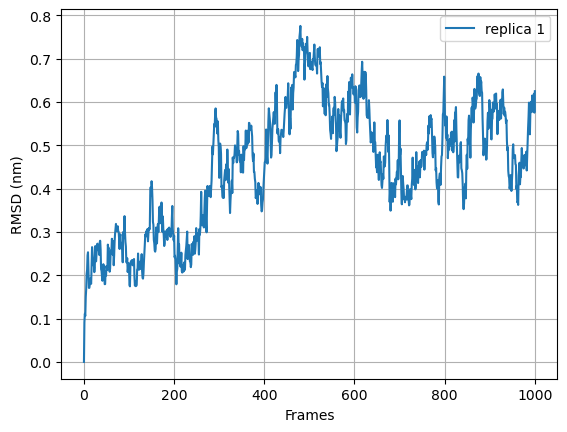

In [12]:
trj_sage_antrop_rest = plot_rmsd_fluctuations_multiple(['REST/antropisomer/replica_0_ligand_samples.pdb'], 'REST/ligand_antropisomer.pdb', 'line', 1, ['REST/antropisomer/0_processed.xtc'])

<Axes: >

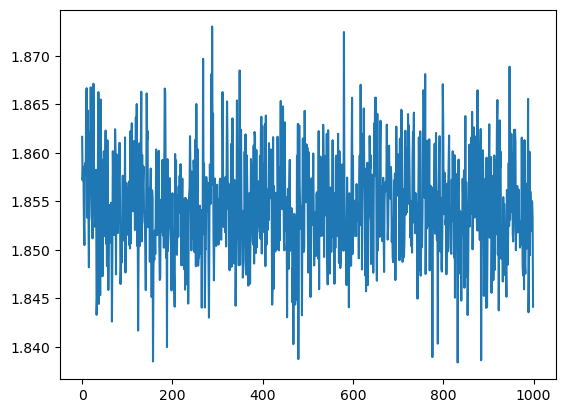

In [13]:
sns.lineplot(md.compute_rg(trj_gaff))

<Axes: >

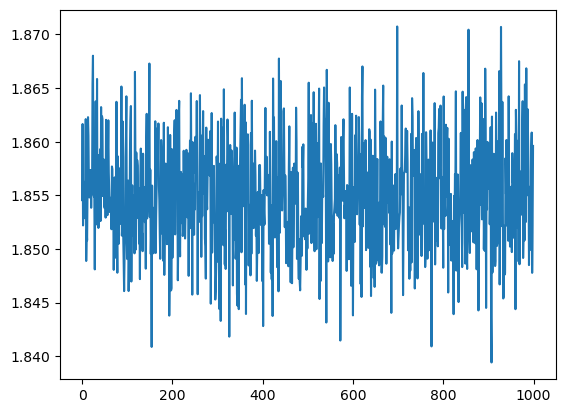

In [14]:
sns.lineplot(md.compute_rg(trj_sage))

<Axes: >

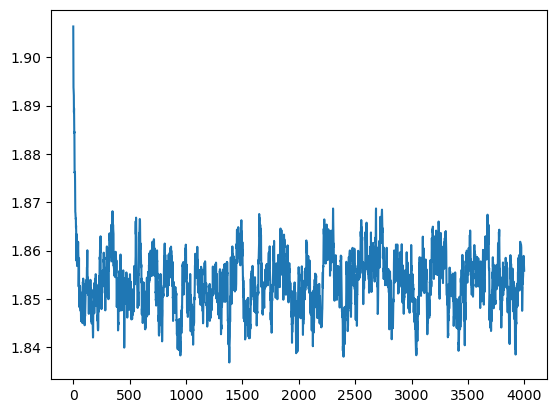

In [15]:
sns.lineplot(md.compute_rg(trj_ani_longtime))

<Axes: >

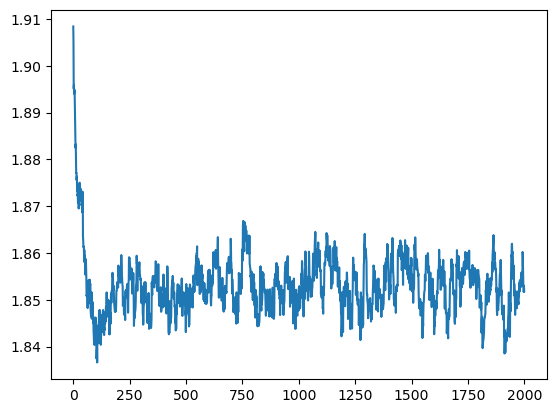

In [16]:
sns.lineplot(md.compute_rg(trj_mace))

<Axes: >

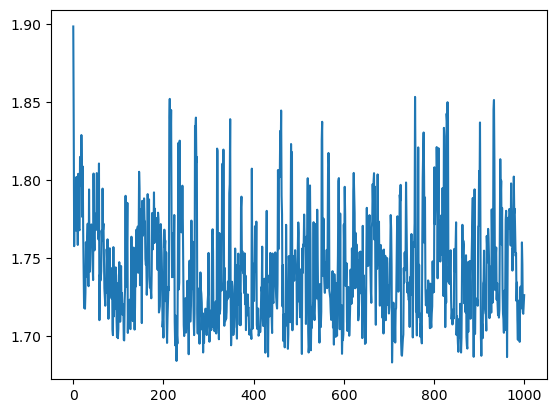

In [17]:
sns.lineplot(md.compute_rg(trj_sage_remd))

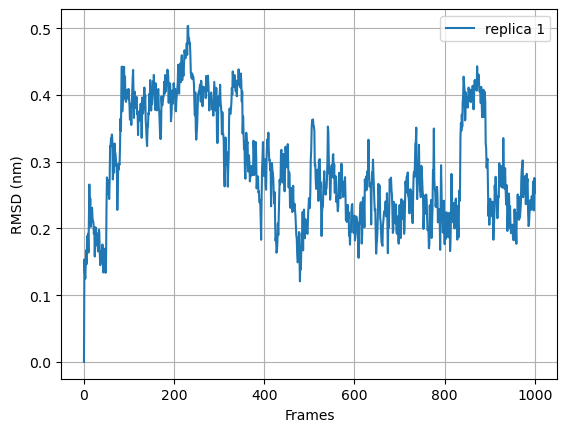

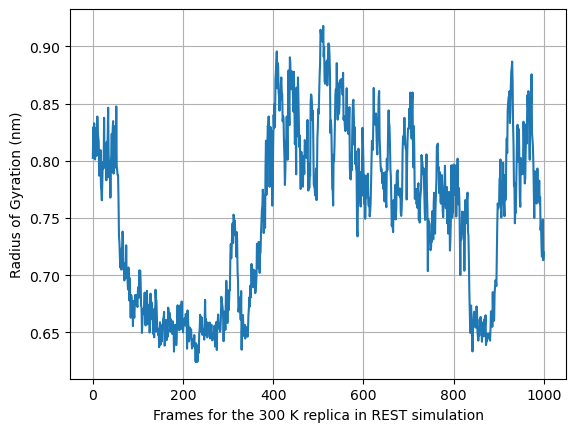

In [18]:
trj_sage_rest = plot_rmsd_fluctuations_multiple(['REST/REST_4/replica_0_ligand_samples.pdb'], 'REST/ligand.pdb', 'line', 1, ['REST/REST_4/0_processed.xtc'])
plt.plot(md.compute_rg(trj_sage_rest))
plt.xlabel('Frames for the 300 K replica in REST simulation')
plt.ylabel('Radius of Gyration (nm)')
plt.grid(True)

In [27]:
def plot_dihedral_angles(traj_cont, atom_indices):
    dihedral_angles = md.compute_dihedrals(traj_cont, [atom_indices])
    dihedral_angles_deg = np.degrees(dihedral_angles[:, 0])
    plt.figure(figsize=(8, 6))
    sns.kdeplot(dihedral_angles_deg)
    plt.xlabel('Dihedral Angle (degrees)')
    plt.ylabel('Density')
    plt.title('Distribution of biaryl dihedral angles in REST simulation')
    plt.xlim(-180, 180)
    plt.grid(True)
    plt.show()
    plt.close()
    return np.mean(dihedral_angles_deg)

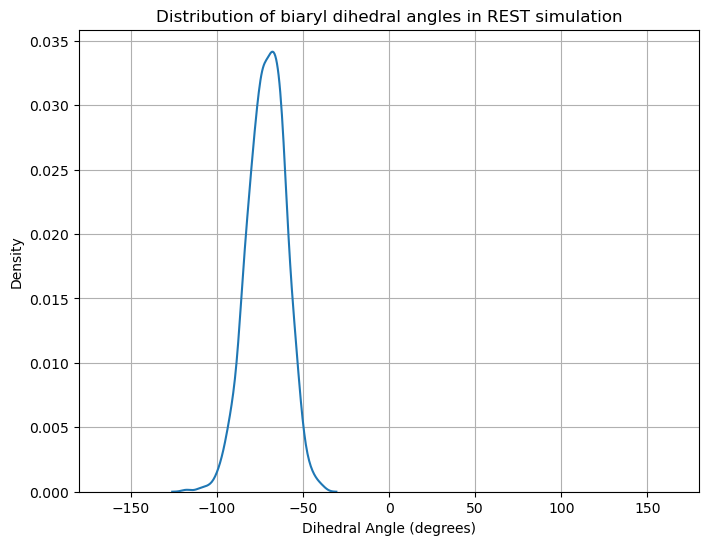

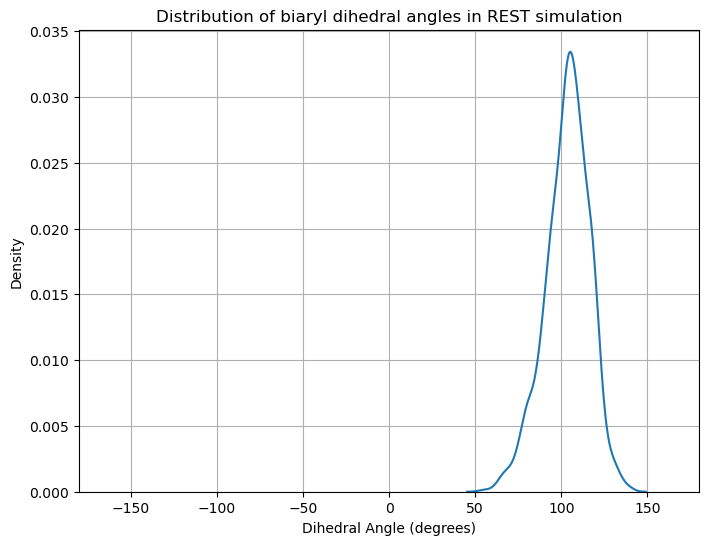

np.float32(103.44519)

In [28]:
#plot_dihedral_angles(trj_gaff, [11, 10, 9, 4])
#plot_dihedral_angles(trj_sage, [11, 10, 9, 4])
#plot_dihedral_angles(trj_ani_longtime, [11, 10, 9, 4])
#plot_dihedral_angles(trj_mace, [11, 10, 9, 4])
#plot_dihedral_angles(trj_sage_remd, [11, 10, 9, 4])
plot_dihedral_angles(trj_sage_rest, [11, 10, 9, 4])
plot_dihedral_angles(trj_sage_antrop_rest, [11, 10, 9, 4])

In [23]:
def plot_distance(traj_cont, atom_indices):
    atom_pairs = np.array([atom_indices])
    distances = md.compute_distances(traj_cont, atom_pairs)
    distance = distances[:, 0]
    plt.figure(figsize=(8, 6))
    sns.kdeplot(distance)
    plt.xlabel('Distance (nm)')
    plt.ylabel('Density')
    plt.title('Distribution of distance on substituted morpholine ring')
    plt.xlim(0.3, 0.4)
    plt.grid(True)
    plt.show()
    plt.close()
    return np.mean(distance)

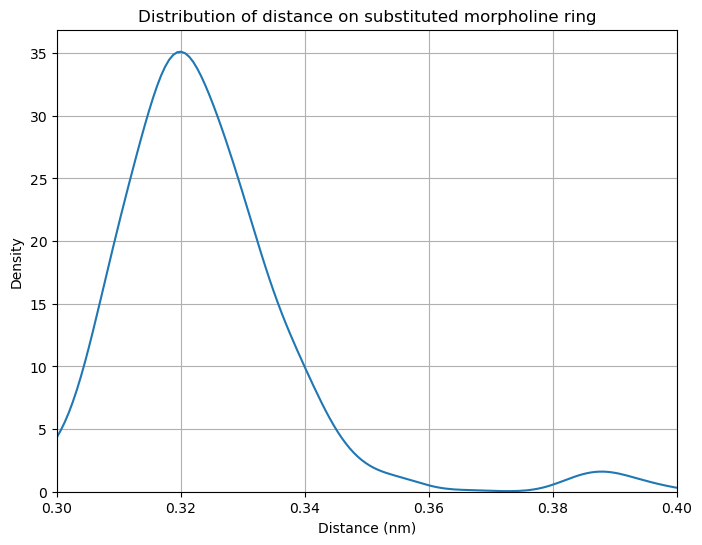

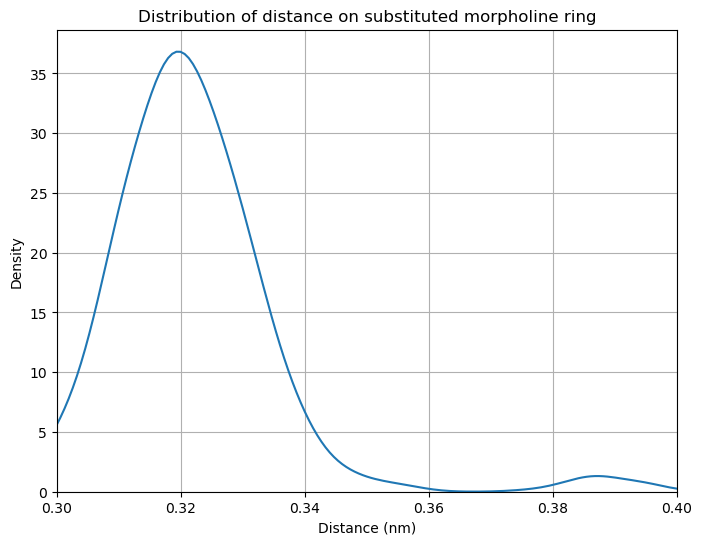

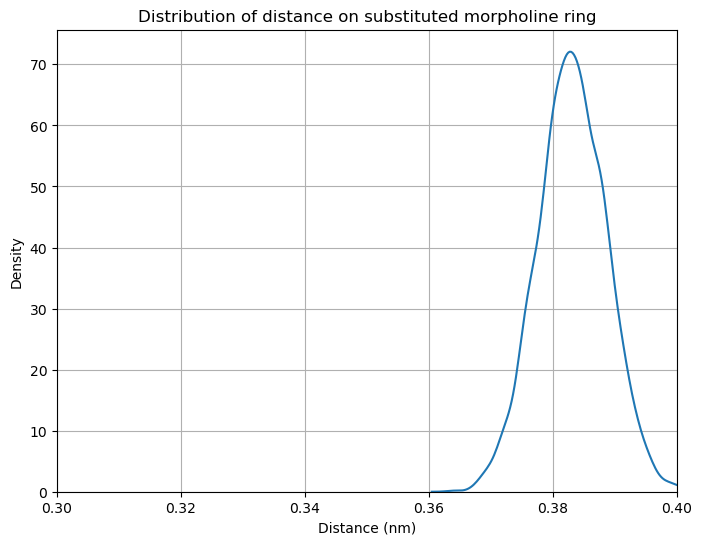

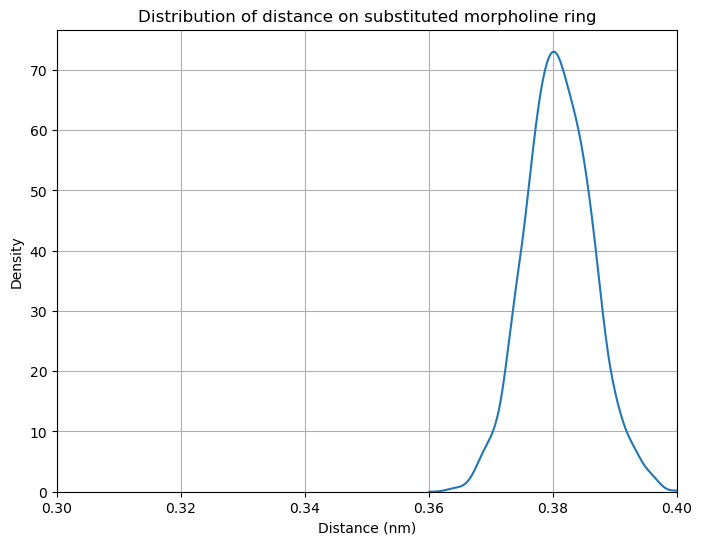

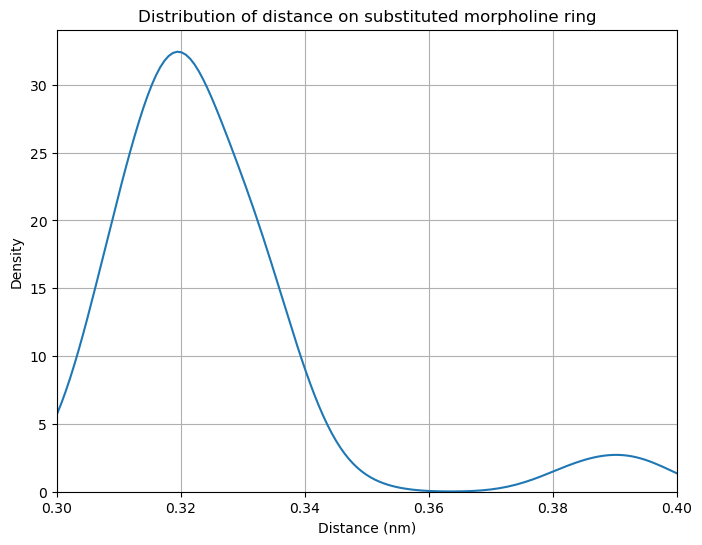

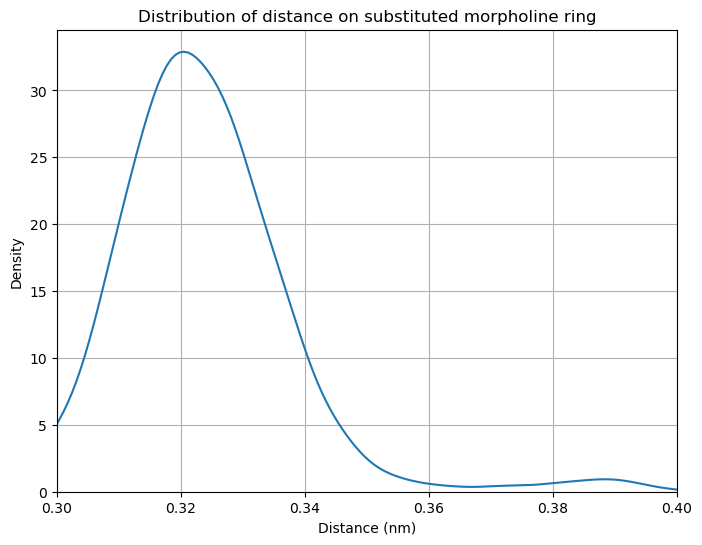

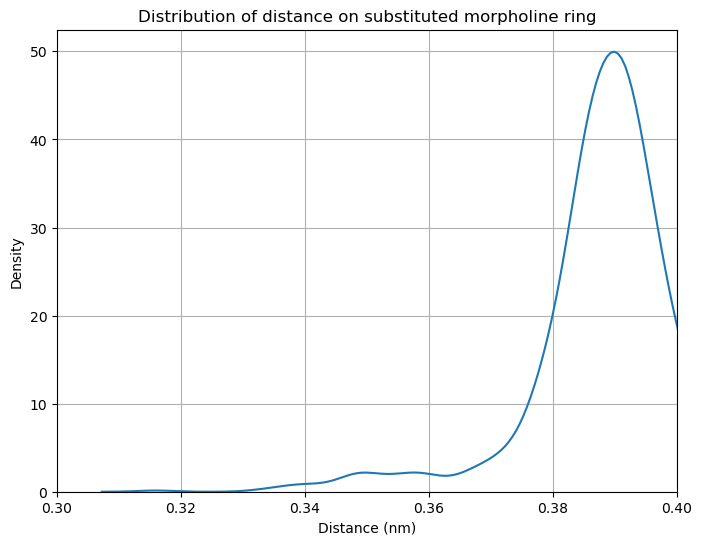

np.float32(0.38748544)

In [24]:
plot_distance(trj_gaff, [55, 58])
plot_distance(trj_sage, [55, 58])
plot_distance(trj_ani_longtime, [55, 58])
plot_distance(trj_mace, [55, 58])
plot_distance(trj_sage_remd, [55, 58])
plot_distance(trj_sage_rest, [55, 58])
plot_distance(trj_sage_antrop_rest, [54, 57])

In [16]:
def plot_ligand_pca(traj_files, top_file, slice_step=1):
        traj_cont = md.load(traj_files[0], top=top_file)[::slice_step]
        for i, traj_file in enumerate(traj_files[1:]):
                traj = md.load(traj_file, top=top_file)[::slice_step]
                traj_cont = md.join([traj_cont, traj])
        try:    
                traj_cont.image_molecules(inplace=True)
        except:
                pass
        ligand_atoms = traj_cont.topology.select('resname UNK')
        traj_cont.superpose(traj_cont, frame=0, atom_indices=ligand_atoms)
        ligand_xyz = traj_cont.xyz[:, ligand_atoms, :]
        ligand_xyz_flat = ligand_xyz.reshape(traj_cont.n_frames, len(ligand_atoms) * 3)
        pca1 = PCA(n_components=2)
        reduced_cartesian = pca1.fit_transform(ligand_xyz_flat)
        plt.figure(figsize=(8, 6))
        kde = sns.kdeplot(
                x=reduced_cartesian[:, 0],
                y=reduced_cartesian[:, 1],
                fill=True,
                cmap="viridis",
                thresh=0,
                levels=100
        )
        plt.xlabel('PC1')
        plt.ylabel('PC2')
        plt.title('KDE of Ligand PCA Coordinates')
        mappable = kde.collections[0]
        plt.colorbar(mappable, label='Density')
        plt.show()
        plt.close()
        return traj_cont

dcdplugin) detected standard 32-bit DCD file of native endianness
dcdplugin) CHARMM format DCD file (also NAMD 2.1 and later)


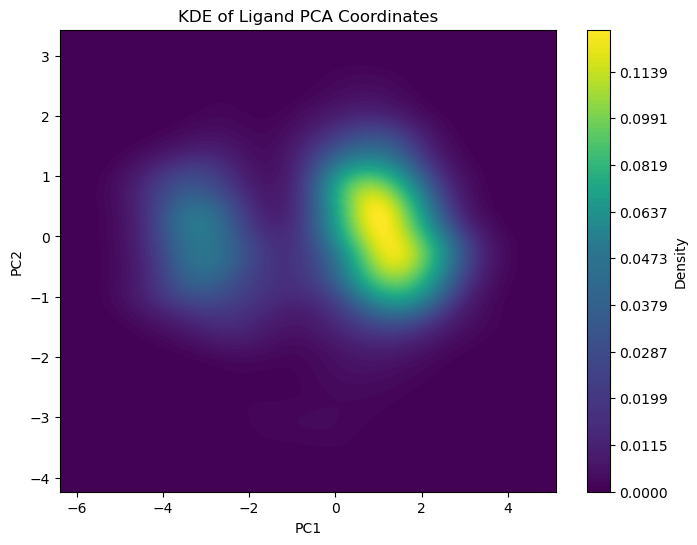

dcdplugin) detected standard 32-bit DCD file of native endianness
dcdplugin) CHARMM format DCD file (also NAMD 2.1 and later)


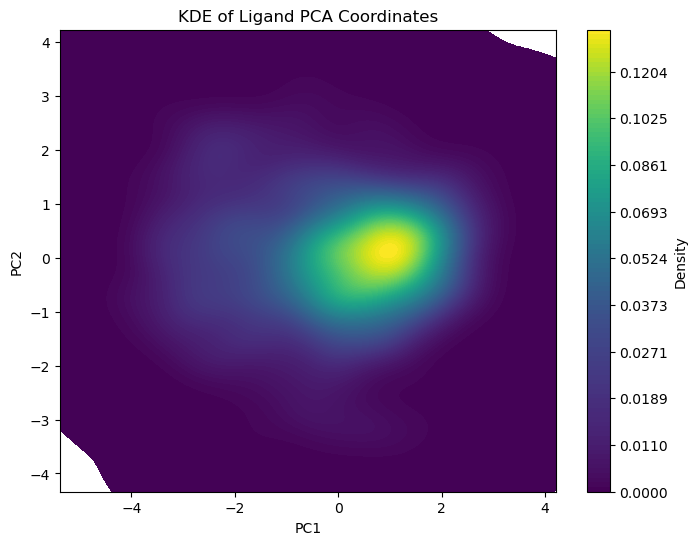

dcdplugin) detected standard 32-bit DCD file of native endianness
dcdplugin) CHARMM format DCD file (also NAMD 2.1 and later)


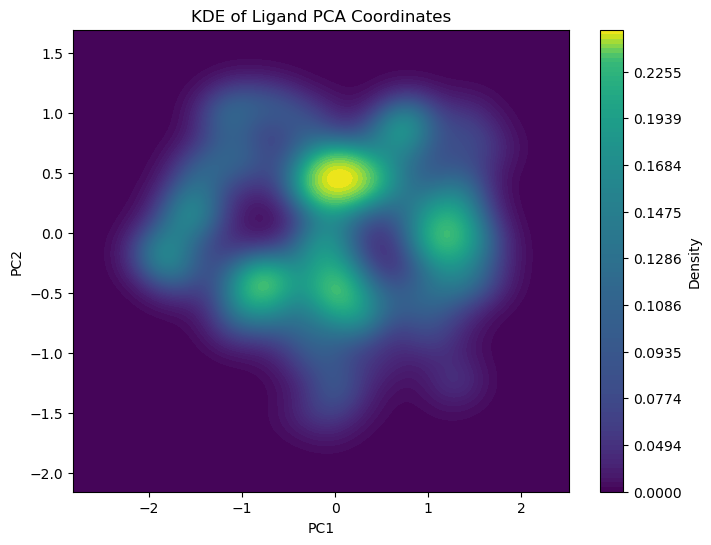

dcdplugin) detected standard 32-bit DCD file of native endianness
dcdplugin) CHARMM format DCD file (also NAMD 2.1 and later)


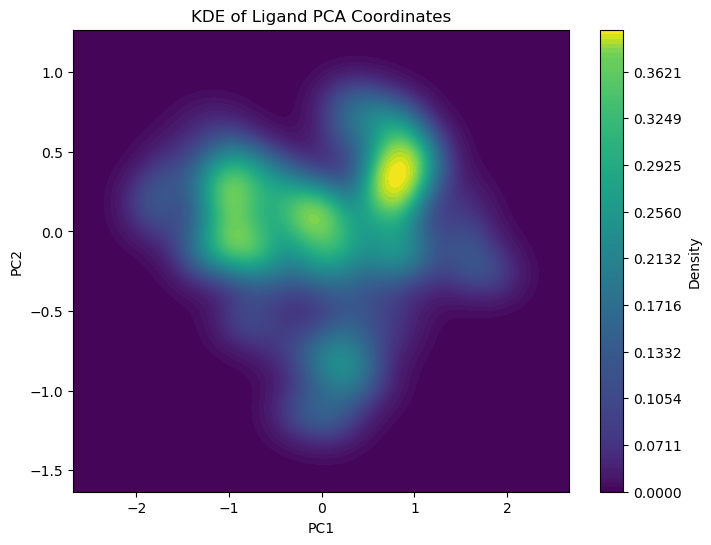

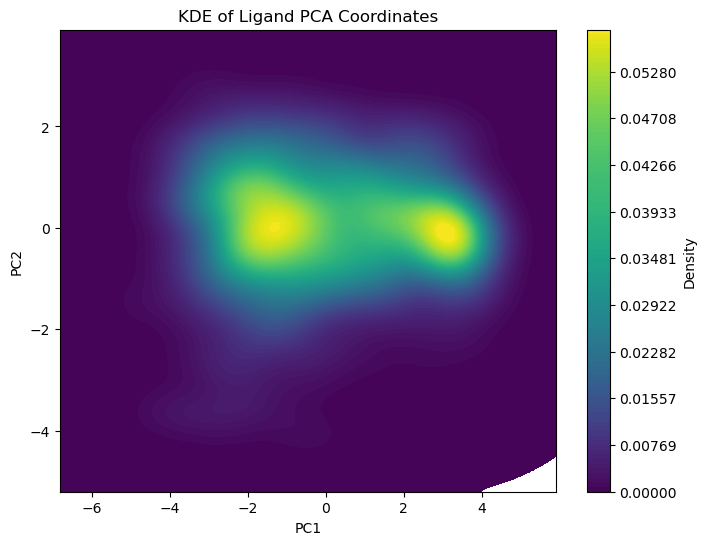

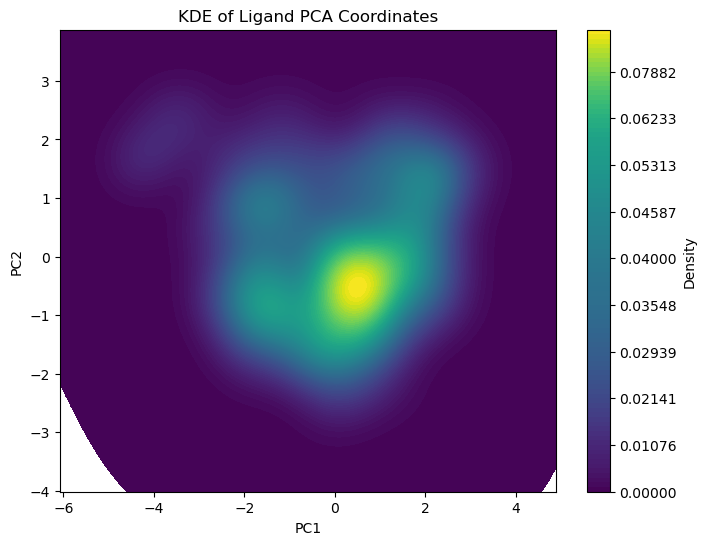

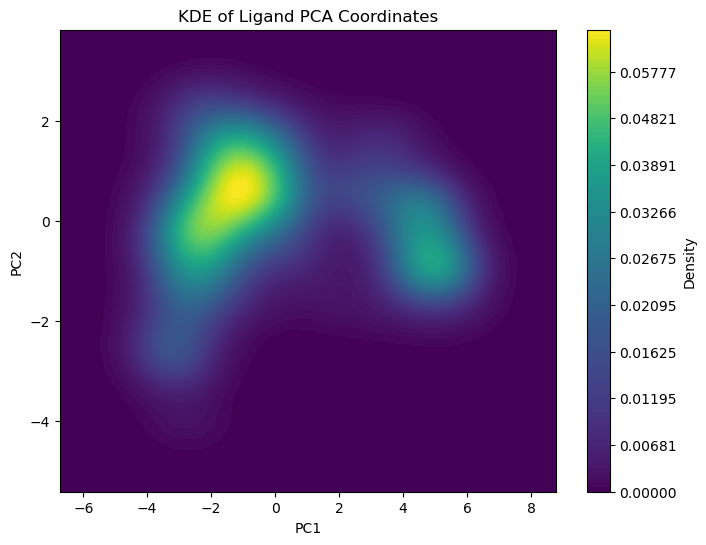

<mdtraj.Trajectory with 1001 frames, 151 atoms, 1 residues, without unitcells at 0x7cad9acf9110>

In [17]:
plot_ligand_pca(['classic/classic_gaff/trajectory.dcd'], 'classic/classic_gaff/gaff_ligand_in_solvent.pdb')
plot_ligand_pca(['classic/classic_sage/trajectory.dcd'], 'classic/classic_sage/ligand_in_solvent.pdb')
#plot_ligand_pca(['classic/classic_ANI2x/test_ani_mixed.dcd'], 'classic/classic_ANI2x/gaff_ligand_in_solvent.pdb')
plot_ligand_pca(['classic/classic_ANI2x_longtime/test_ani_mixed.dcd'], 'classic/classic_ANI2x_longtime/gaff_ligand_in_solvent.pdb')
plot_ligand_pca(['classic/classic_MACEsmall/test_mace_mixed.dcd'], 'classic/classic_MACEsmall/gaff_ligand_in_solvent.pdb')
plot_ligand_pca(['REMD/REMD_2/0_sorted_md_pbc.xtc'], 'REMD/ligand_in_solvent.pdb')
plot_ligand_pca(['REST/REST_2/replica_0_ligand_samples.pdb'], 'REST/ligand.pdb')
plot_ligand_pca(['REST/antropisomer/replica_0_ligand_samples.pdb'], 'REST/ligand_antropisomer.pdb')

In [1]:
import re
import os
import json
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
#
def extract_and_split_data(directory):
    all_data = []
    for filename in os.listdir(directory):
        if filename.endswith('.json'):
            filepath = os.path.join(directory, filename)
            with open(filepath, 'r') as file:
                data = json.load(file)
                all_data.append({'filename': filename, 'energy': data["total energy"], 'HOMO_LUMO_gap': data["HOMO-LUMO gap / eV"]})
                df = pd.DataFrame(all_data)
    return df

df = extract_and_split_data('XTB_opt')
df
 

,filename,energy,HOMO_LUMO_gap
0,ANI2x_0001_opt.json,-221.318412,2.520763
1,ANI2x_0002_opt.json,-221.318331,2.539099
2,ANI2x_0003_opt.json,-221.319437,2.525212
3,ANI2x_0004_opt.json,-221.318942,2.535930
4,ANI2x_0005_opt.json,-221.319178,2.525628
...,...,...,...
15001,SAGE_0996_opt.json,-221.321926,2.631728
15002,SAGE_0997_opt.json,-221.325065,2.679623
15003,SAGE_0998_opt.json,-221.323575,2.700723
15004,SAGE_0999_opt.json,-221.323211,2.514509


In [6]:
df['method'] = df['filename'].apply(lambda x: x.split('_')[:-2])
df['method'] = df['method'].apply(lambda x: '_'.join(x))

In [7]:
df_final = df[df['method'].isin(['GAFF', 'SAGE', 'ANI2x_L', 'MACEsmall', 'REMD', 'REST600d'])]
#
df_final['method'] = df_final['method'].apply(lambda x: 'GAFF 10 ns classic' if x == 'GAFF' else x)
df_final['method'] = df_final['method'].apply(lambda x: 'SAGE 10 ns classic' if x == 'SAGE' else x)
df_final['method'] = df_final['method'].apply(lambda x: 'SAGE 10 ns (16 REMD up to 475K)' if x == 'REMD' else x)
df_final['method'] = df_final['method'].apply(lambda x: 'SAGE 10 ns (16 REST up to 600K)' if x == 'REST600d' else x)
df_final['method'] = df_final['method'].apply(lambda x: 'ANI2x 0.2 ns (ML/MM)' if x == 'ANI2x_L' else x)
df_final['method'] = df_final['method'].apply(lambda x: 'MACEsmall 0.1 ns (ML/MM)' if x == 'MACEsmall' else x)

/tmp/ipykernel_386318/3908926416.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['method'] = df_final['method'].apply(lambda x: 'GAFF 10 ns classic' if x == 'GAFF' else x)
/tmp/ipykernel_386318/3908926416.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['method'] = df_final['method'].apply(lambda x: 'SAGE 10 ns classic' if x == 'SAGE' else x)
/tmp/ipykernel_386318/3908926416.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

In [8]:
df_final.rename(columns={'energy': 'XTB_opt_Energy (+ ALPB) / Hatree', 'method': 'sampling method in explicit TIP3P'}, inplace=True)
df_final.sort_values(by='XTB_opt_Energy (+ ALPB) / Hatree', inplace=True)
df_final['XTB_opt_Energy (+ ALPB) / kcal/mol'] = df_final['XTB_opt_Energy (+ ALPB) / Hatree'] * 627.509
df_final.drop(columns=['XTB_opt_Energy (+ ALPB) / Hatree'], inplace=True)
df_final.iloc[:5000].to_csv('top_5000_xtb_energies.csv', index=False)
top_10_per_group = df_final.groupby('sampling method in explicit TIP3P').head(10)
top_10_per_group.to_csv('top_10_xtb_energies_per_group.csv', index=False)

/tmp/ipykernel_386318/3806703966.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final.rename(columns={'energy': 'XTB_opt_Energy (+ ALPB) / Hatree', 'method': 'sampling method in explicit TIP3P'}, inplace=True)
/tmp/ipykernel_386318/3806703966.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final.sort_values(by='XTB_opt_Energy (+ ALPB) / Hatree', inplace=True)
/tmp/ipykernel_386318/3806703966.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.o

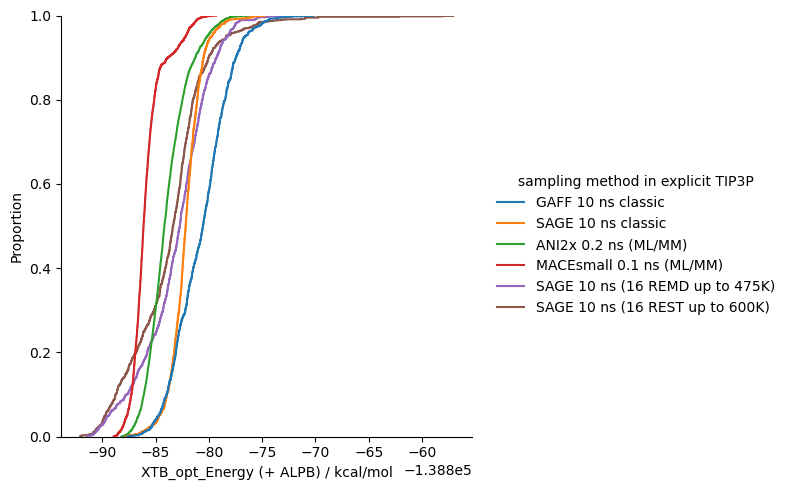

In [9]:
hue_order = ['GAFF 10 ns classic', 'SAGE 10 ns classic','ANI2x 0.2 ns (ML/MM)', 'MACEsmall 0.1 ns (ML/MM)', 'SAGE 10 ns (16 REMD up to 475K)', 'SAGE 10 ns (16 REST up to 600K)']
sns.displot(data=df_final, x='XTB_opt_Energy (+ ALPB) / kcal/mol', kind='ecdf', hue='sampling method in explicit TIP3P', hue_order=hue_order)

In [38]:
for i in top_10_per_group['filename'].to_list():
    filename = i.split('.')[-2] + '.xyz'
    filepath = os.path.join('XTB_opt', filename)
    file_copy_path = os.path.join('dft_spe', filename)
    !cp {filepath} {file_copy_path}    

In [47]:
def prepare_orca_input(xyz_filepath):
    orca_header = [
        '! SP DFT wB97X-D3BJ def2-TZVP RIJCOSX LooseSCF',
        '! D3BJ',
        '! CPCM(water)',
        '%maxcore 4000',
        '%pal',
        '  NProcs 8',
        '  End',
        '* xyz 0 1'
    ]
    orca_trailer = ['*']
    base_name = os.path.splitext(xyz_filepath)[0]
    inp_filepath = base_name + '.inp'

    with open(xyz_filepath, 'r') as f:
        lines = f.readlines()
        
    coordinates = lines[2:]
    modified_content = (
        [line + '\n' for line in orca_header] + 
        coordinates + 
        [line + '\n' for line in orca_trailer]
    )
    
    with open(inp_filepath, 'w') as f:
        f.writelines(modified_content)

    return f"Successfully created ORCA input file: {inp_filepath}"

for filename in os.listdir('dft_spe'):
    if filename.endswith('.xyz'):
        filepath = os.path.join('dft_spe', filename)
        prepare_orca_input(filepath)

In [48]:
def extract_orca_final_energy(filepath):

    final_pattern = r'&FinalEnergy\s+\[&Type "Double"\]\s*(-?\d+\.\d+(?:[Ee][+\-]?\d+)?)\s*"Final single point energy"'

    cpcm_pattern = r'&CPCMDielEnergy\s+\[&Type "Double"\]\s*(-?\d+\.\d+(?:[Ee][+\-]?\d+)?)'

    with open(filepath, 'r') as f:
        content = f.read()
        match = re.search(cpcm_pattern, content)
        match_1 = re.search(final_pattern, content)
        energy_str = match_1.group(1)
        energy_cpcm_str = match.group(1)
        energy = float(energy_str)
        energy_cpcm = float(energy_cpcm_str)
        energy_exclude_cpcm = energy - energy_cpcm
        return energy, energy_exclude_cpcm

In [65]:
def_energy_dict = {}
#
for filename in os.listdir('dft_spe'):
    if filename.endswith('.property.txt'):
        filepath = os.path.join('dft_spe', filename)
        basename = os.path.splitext(filename)[0].replace('.property', '.json')
        # Extract DFT Energy (CPCM)
        energy, energy_exclude_cpcm = extract_orca_final_energy(filepath)
        def_energy_dict[basename] = (energy, energy_exclude_cpcm)
#
df_energy = pd.DataFrame.from_dict(def_energy_dict, orient='index', columns=['DFT_spe_Energy (+ CPCM)', 'DFT_spe_Energy (exclude CPCM)'])
df_energy.reset_index(inplace=True)
df_energy.rename(columns={'index': 'filename'}, inplace=True)
df_energy

,filename,DFT_spe_Energy (+ CPCM),DFT_spe_Energy (exclude CPCM)
0,ANI2x_0508_opt.json,-3339.963960,-3339.884398
1,ANI2x_0521_opt.json,-3339.964377,-3339.883412
2,ANI2x_0681_opt.json,-3339.957099,-3339.874257
3,ANI2x_0682_opt.json,-3339.956837,-3339.874604
4,ANI2x_0703_opt.json,-3339.958211,-3339.877615
...,...,...,...
65,SAGE_0963_opt.json,-3339.970088,-3339.899024
66,SAGE_0964_opt.json,-3339.969662,-3339.896593
67,SAGE_0965_opt.json,-3339.970399,-3339.897912
68,SAGE_0966_opt.json,-3339.970920,-3339.901971


In [66]:
df_energy_0 =pd.read_csv('top_10_xtb_energies_per_group.csv')
df_merged = pd.merge(df_energy_0, df_energy, on='filename', how='inner')
df_merged['DFT_spe_Energy (+ CPCM) / kcal/mol'] = df_merged['DFT_spe_Energy (+ CPCM)'] * 627.509
df_merged['DFT_spe_Energy (exclude CPCM) / kcal/mol'] = df_merged['DFT_spe_Energy (exclude CPCM)'] * 627.509
df_merged.drop(columns=['DFT_spe_Energy (+ CPCM)', 'DFT_spe_Energy (exclude CPCM)'], inplace=True)

Text(0.5, 0.2, 'Pearson r: 0.71 (p-value < 0.05)\nSpearman ρ: 0.68 (p-value < 0.05)')

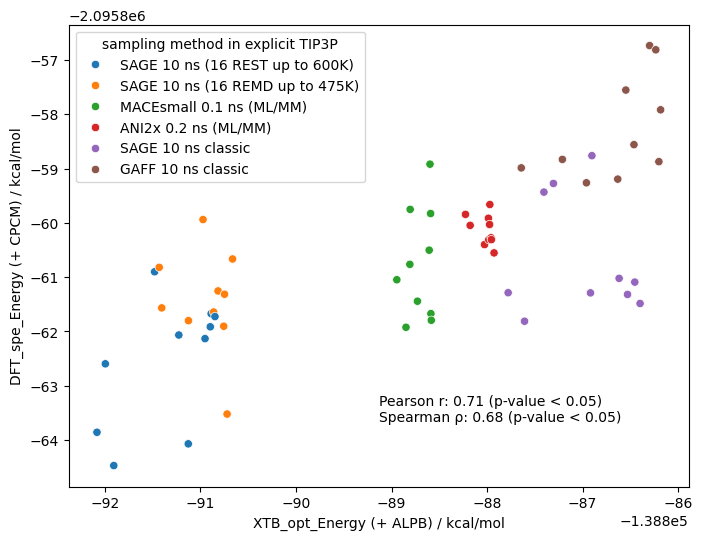

In [67]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 8, 6
sns.scatterplot(data=df_merged, x='XTB_opt_Energy (+ ALPB) / kcal/mol', y='DFT_spe_Energy (+ CPCM) / kcal/mol', hue='sampling method in explicit TIP3P')
#calculate pearson and spearman correlation coefficients with p-values
from scipy.stats import pearsonr, spearmanr
pearson_corr, pearson_pval = pearsonr(df_merged['XTB_opt_Energy (+ ALPB) / kcal/mol'], df_merged['DFT_spe_Energy (+ CPCM) / kcal/mol'])
spearman_corr, spearman_pval = spearmanr(df_merged['XTB_opt_Energy (+ ALPB) / kcal/mol'], df_merged['DFT_spe_Energy (+ CPCM) / kcal/mol'])
#show these values on the plot
plt.text(0.5, 0.2, f'Pearson r: {pearson_corr:.2f} (p-value < 0.05)\nSpearman ρ: {spearman_corr:.2f} (p-value < 0.05)', transform=plt.gca().transAxes, verticalalignment='top')


In [69]:
df_merged.to_csv('xtb_dft_energy_comparison.csv', index=False)

In [70]:
df_merged = pd.read_csv('xtb_dft_energy_comparison.csv')
df_merged.head(10)

,filename,HOMO_LUMO_gap,sampling method in explicit TIP3P,XTB_opt_Energy (+ ALPB) / kcal/mol,DFT_spe_Energy (+ CPCM) / kcal/mol,DFT_spe_Energy (exclude CPCM) / kcal/mol
0,REST600d_0162_opt.json,2.583419,SAGE 10 ns (16 REST up to 600K),-138892.082573,-2.095864e+06,-2.095821e+06
1,REST600d_0157_opt.json,2.625940,SAGE 10 ns (16 REST up to 600K),-138891.995036,-2.095863e+06,-2.095820e+06
2,REST600d_0166_opt.json,2.631995,SAGE 10 ns (16 REST up to 600K),-138891.906657,-2.095864e+06,-2.095821e+06
3,REST600d_0844_opt.json,2.563681,SAGE 10 ns (16 REST up to 600K),-138891.479261,-2.095861e+06,-2.095817e+06
4,REMD_0960_opt.json,2.579695,SAGE 10 ns (16 REMD up to 475K),-138891.431043,-2.095861e+06,-2.095817e+06
5,REMD_0063_opt.json,2.600165,SAGE 10 ns (16 REMD up to 475K),-138891.404751,-2.095862e+06,-2.095819e+06
6,REST600d_0179_opt.json,2.511879,SAGE 10 ns (16 REST up to 600K),-138891.225835,-2.095862e+06,-2.095819e+06
7,REST600d_0167_opt.json,2.636488,SAGE 10 ns (16 REST up to 600K),-138891.127015,-2.095864e+06,-2.095821e+06
8,REMD_0069_opt.json,2.583855,SAGE 10 ns (16 REMD up to 475K),-138891.125126,-2.095862e+06,-2.095819e+06
9,REMD_0943_opt.json,2.537188,SAGE 10 ns (16 REMD up to 475K),-138890.972773,-2.095860e+06,-2.095815e+06


In [22]:
final_list = df_merged['filename'].apply(lambda x: x.split('.')[-2] + '.xyz').to_list()
!mkdir -p final_xyz
for i in final_list:
    filename = i
    filepath = os.path.join('XTB_opt', filename)
    file_copy_path = os.path.join('final_xyz', filename)
    !cp {filepath} {file_copy_path}

In [ ]:
for i in final_list:
    !python MMFF_models/eval_configs.py --configs final_xyz/{i} --model MMFF_models/MACE-OFF24_medium.model --output final_xyz/{i.split('.')[0]}_mace24medium.xyz --device cuda
    !python MMFF_models/eval_configs.py --configs final_xyz/{i} --model MMFF_models/MACE-OFF23_large.model --output final_xyz/{i.split('.')[0]}_mace23large.xyz --device cuda

In [71]:
def extract_mace_final_energy(filepath):

    regex_pattern = r'MACE_energy=(-?\d+\.\d+(?:[Ee][+\-]?\d+)?)'

    with open(filepath, 'r') as f:
        content = f.read()
        match = re.search(regex_pattern, content)
        energy_str = match.group(1)
        energy = float(energy_str)
        return energy

extract_mace_final_energy('final_xyz/REST600d_0166_opt_mace24medium.xyz')

-90873.62339438233

In [73]:
mace_medium_energy_dict = {}
#
for filename in os.listdir('final_xyz'):
    if filename.endswith('_opt.xyz'):
        basename = '_'.join(os.path.splitext(filename)[0].split('_')[:4])
        indexname = basename + '.json'
        #
        mace24medium_name = basename + '_mace24medium.xyz'
        filepath_1 = os.path.join('final_xyz', mace24medium_name)
        mace24medium_energy = extract_mace_final_energy(filepath_1)
        #
        mace23large_name = basename + '_mace23large.xyz'
        filepath_2 = os.path.join('final_xyz', mace23large_name)
        mace23large_energy = extract_mace_final_energy(filepath_2)

        mace_medium_energy_dict[indexname] = (mace24medium_energy, mace23large_energy)

df_mace_energy = pd.DataFrame.from_dict(mace_medium_energy_dict, orient='index', columns=['MACE24medium_Energy', 'MACE23large_Energy'])
df_mace_energy.reset_index(inplace=True)
df_mace_energy.rename(columns={'index': 'filename'}, inplace=True)
df_mace_energy['MACE24medium_Energy / kJ/mol'] = df_mace_energy['MACE24medium_Energy'] * 96.485 # eV to kJ/mol
df_mace_energy['MACE24medium_Energy / kcal/mol'] = df_mace_energy['MACE24medium_Energy'] * 23.062 # eV to kcal/mol
df_mace_energy['MACE23large_Energy / kJ/mol'] = df_mace_energy['MACE23large_Energy'] * 96.485 # eV to kJ/mol
df_mace_energy['MACE23large_Energy / kcal/mol'] = df_mace_energy['MACE23large_Energy'] * 23.062 # eV to kcal/mol
df_mace_energy.drop(columns=['MACE24medium_Energy', 'MACE23large_Energy', 'MACE24medium_Energy / kJ/mol', 'MACE23large_Energy / kJ/mol'], inplace=True)
df_mace_energy


,filename,MACE24medium_Energy / kcal/mol,MACE23large_Energy / kcal/mol
0,ANI2x_L_1254_opt.json,-2.095722e+06,-2.095721e+06
1,ANI2x_L_1256_opt.json,-2.095722e+06,-2.095721e+06
2,ANI2x_L_1258_opt.json,-2.095722e+06,-2.095721e+06
3,ANI2x_L_1262_opt.json,-2.095722e+06,-2.095721e+06
4,ANI2x_L_1264_opt.json,-2.095722e+06,-2.095721e+06
5,ANI2x_L_1265_opt.json,-2.095722e+06,-2.095721e+06
6,ANI2x_L_1266_opt.json,-2.095721e+06,-2.095721e+06
7,ANI2x_L_1276_opt.json,-2.095722e+06,-2.095721e+06
8,ANI2x_L_1277_opt.json,-2.095722e+06,-2.095721e+06
9,ANI2x_L_1279_opt.json,-2.095722e+06,-2.095720e+06


In [74]:
df_merged = pd.merge(df_merged, df_mace_energy, on='filename', how='inner')

0.823598772875926 6.527767654784281e-16
0.7886079466518479 7.374039886538025e-14


Text(0.5, 0.2, 'Pearson r: 0.82 (p-value < 0.05)\nSpearman ρ: 0.79 (p-value < 0.05)')

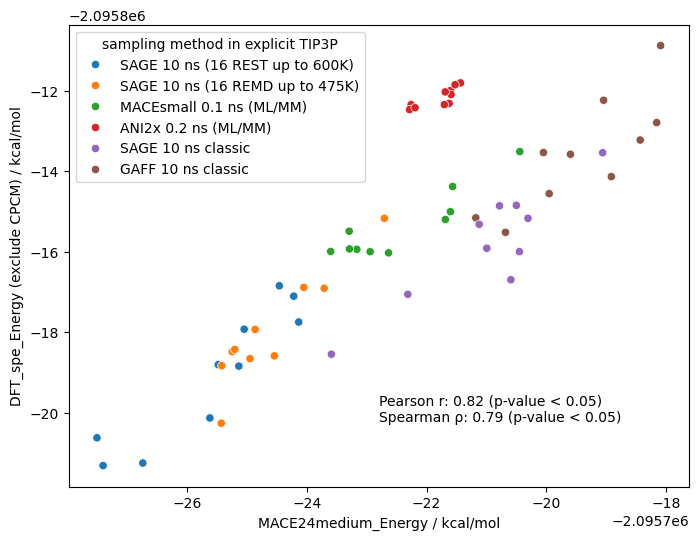

In [77]:
sns.scatterplot(data=df_merged, x='MACE24medium_Energy / kcal/mol', y='DFT_spe_Energy (exclude CPCM) / kcal/mol', hue='sampling method in explicit TIP3P')
#calculate pearson and spearman correlation coefficients with p-values
from scipy.stats import pearsonr, spearmanr
pearson_corr, pearson_pval = pearsonr(df_merged['MACE24medium_Energy / kcal/mol'], df_merged['DFT_spe_Energy (exclude CPCM) / kcal/mol'])
spearman_corr, spearman_pval = spearmanr(df_merged['MACE24medium_Energy / kcal/mol'], df_merged['DFT_spe_Energy (exclude CPCM) / kcal/mol'])
print(pearson_corr, pearson_pval)
print(spearman_corr, spearman_pval)
#show these values on the plot
plt.text(0.5, 0.2, f'Pearson r: {pearson_corr:.2f} (p-value < 0.05)\nSpearman ρ: {spearman_corr:.2f} (p-value < 0.05)', transform=plt.gca().transAxes, verticalalignment='top')

0.8214900282738308 8.931376872900145e-16
0.8154487357599335 2.1444248026797883e-15


Text(0.5, 0.2, 'Pearson r: 0.82 (p-value < 0.05)\nSpearman ρ: 0.82 (p-value < 0.05)')

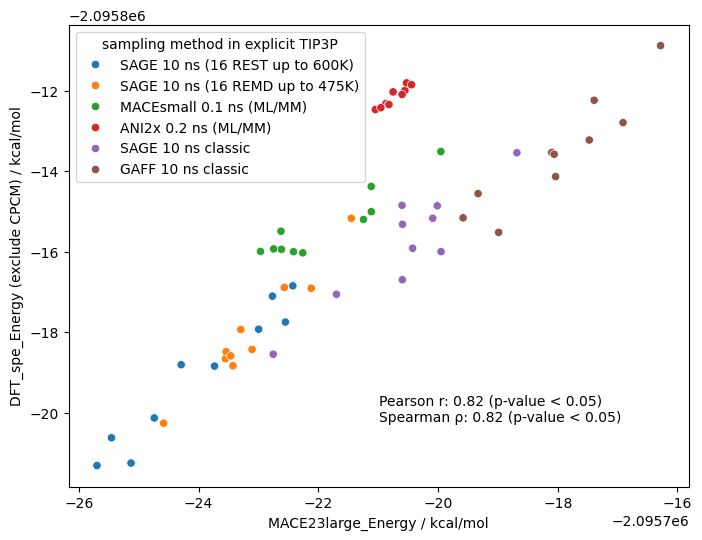

In [78]:
sns.scatterplot(data=df_merged, x='MACE23large_Energy / kcal/mol', y='DFT_spe_Energy (exclude CPCM) / kcal/mol', hue='sampling method in explicit TIP3P')
#calculate pearson and spearman correlation coefficients with p-values
from scipy.stats import pearsonr, spearmanr
pearson_corr, pearson_pval = pearsonr(df_merged['MACE23large_Energy / kcal/mol'], df_merged['DFT_spe_Energy (exclude CPCM) / kcal/mol'])
spearman_corr, spearman_pval = spearmanr(df_merged['MACE23large_Energy / kcal/mol'], df_merged['DFT_spe_Energy (exclude CPCM) / kcal/mol'])
print(pearson_corr, pearson_pval)
print(spearman_corr, spearman_pval)
#show these values on the plot
plt.text(0.5, 0.2, f'Pearson r: {pearson_corr:.2f} (p-value < 0.05)\nSpearman ρ: {spearman_corr:.2f} (p-value < 0.05)', transform=plt.gca().transAxes, verticalalignment='top')

In [79]:
df_merged.to_csv('xtb_dft_mace_energy_comparison.csv', index=False)

In [11]:
#uma environment
import os
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from ase.io import read
from fairchem.core import FAIRChemCalculator
from fairchem.core.units.mlip_unit import load_predict_unit

In [3]:
esen_predictor = load_predict_unit(
    path="MMFF_models/esen_sm_conserving_all.pt",
    device="cuda",
)
esen_calculator = FAIRChemCalculator(esen_predictor)
#
df = pd.read_csv('xtb_dft_mace_energy_comparison.csv')
final_list = df['filename'].to_list()

omol25_energy_dict = {}
for i in final_list:
    basename = i.split('.')[0] + '.xyz'
    atoms = read(f'final_xyz/{basename}')
    atoms.info = {"charge": 0, "spin": 1}
    atoms.calc = esen_calculator
    energy_eV = atoms.get_potential_energy()
    omol25_energy_dict[i] = energy_eV

/home/haolan/anaconda3/envs/uma/lib/python3.12/site-packages/pydantic/_internal/_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'repr' attribute with value False was provided to the `Field()` function, which has no effect in the context it was used. 'repr' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened because an `Annotated` type alias using the `type` statement was used, or if the `Field()` function was attached to a single member of a union type.
  warnings.warn(
/home/haolan/anaconda3/envs/uma/lib/python3.12/site-packages/pydantic/_internal/_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'frozen' attribute with value True was provided to the `Field()` function, which has no effect in the context it was used. 'frozen' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened because a

In [4]:
import pickle
with open('omol25_energy_dict.pkl', 'wb') as f:
    pickle.dump(omol25_energy_dict, f)

In [5]:
with open('omol25_energy_dict.pkl', 'rb') as f:
    omol25_energy_dict = pickle.load(f)
omol25_energy_dict = dict(sorted(omol25_energy_dict.items(), key=lambda x: x[1]))

In [7]:
df_omol25 = pd.DataFrame.from_dict(omol25_energy_dict, orient='index', columns=['OMOL25_Energy / eV'])
df_omol25.reset_index(inplace=True)
df_omol25.rename(columns={'index': 'filename'}, inplace=True)
df_omol25['OMOL25_Energy / kcal/mol'] = df_omol25['OMOL25_Energy / eV'] * 23.062 # eV to kcal/mol
df_omol25.drop(columns=['OMOL25_Energy / eV'], inplace=True)
df_final = pd.merge(df, df_omol25, on='filename', how='inner')

0.9736201852054596 6.443061019681058e-39
0.9654348430119478 1.458557450536298e-35


Text(0.5, 0.2, 'Pearson r: 0.97 (p-value < 0.05)\nSpearman ρ: 0.97 (p-value < 0.05)')

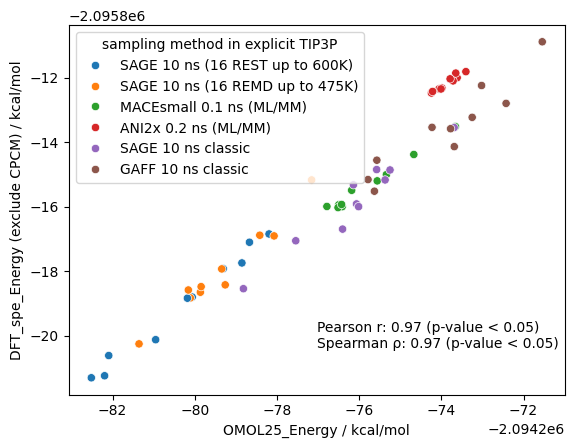

In [12]:
sns.scatterplot(data=df_final, x='OMOL25_Energy / kcal/mol', y='DFT_spe_Energy (exclude CPCM) / kcal/mol', hue='sampling method in explicit TIP3P')
#calculate pearson and spearman correlation coefficients with p-values
from scipy.stats import pearsonr, spearmanr
pearson_corr, pearson_pval = pearsonr(df_final['OMOL25_Energy / kcal/mol'], df_final['DFT_spe_Energy (exclude CPCM) / kcal/mol'])
spearman_corr, spearman_pval = spearmanr(df_final['OMOL25_Energy / kcal/mol'], df_final['DFT_spe_Energy (exclude CPCM) / kcal/mol'])
print(pearson_corr, pearson_pval)
print(spearman_corr, spearman_pval)
#show these values on the plot
plt.text(0.5, 0.2, f'Pearson r: {pearson_corr:.2f} (p-value < 0.05)\nSpearman ρ: {spearman_corr:.2f} (p-value < 0.05)', transform=plt.gca().transAxes, verticalalignment='top')

In [13]:
uma_predictor = load_predict_unit(
    path="MMFF_models/uma-s-1p1.pt",
    device="cuda",
)
uma_calculator = FAIRChemCalculator(uma_predictor, task_name="omol")
#
uma_energy_dict = {}
for i in final_list:
    basename = i.split('.')[0] + '.xyz'
    atoms = read(f'final_xyz/{basename}')
    atoms.info = {"charge": 0, "spin": 1}
    atoms.calc = uma_calculator
    energy_eV = atoms.get_potential_energy()
    uma_energy_dict[i] = energy_eV
#
with open('uma_energy_dict.pkl', 'wb') as f:
    pickle.dump(uma_energy_dict, f)

0.977899282493919 4.0312121067623973e-41
0.9699360933592666 2.7138482101427446e-37


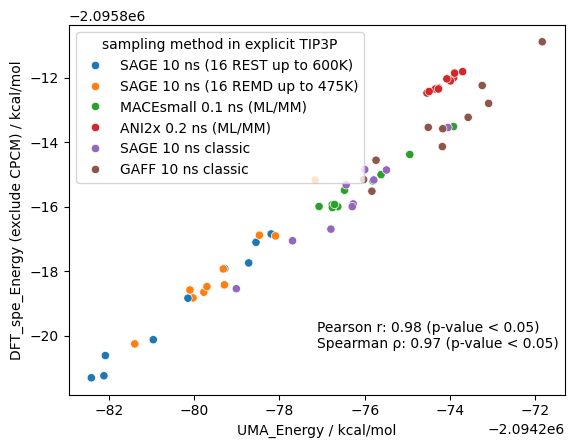

In [14]:
with open('uma_energy_dict.pkl', 'rb') as f:
    uma_energy_dict = pickle.load(f)
uma_energy_dict = dict(sorted(uma_energy_dict.items(), key=lambda x: x[1]))

df_uma = pd.DataFrame.from_dict(uma_energy_dict, orient='index', columns=['UMA_Energy'])
df_uma.reset_index(inplace=True)
df_uma.rename(columns={'index': 'filename'}, inplace=True)
df_uma['UMA_Energy / kcal/mol'] = df_uma['UMA_Energy'] * 23.062 # eV to kcal/mol
df_uma.drop(columns=['UMA_Energy'], inplace=True)
df_final = pd.merge(df_final, df_uma, on='filename', how='inner')
sns.scatterplot(data=df_final, x='UMA_Energy / kcal/mol', y='DFT_spe_Energy (exclude CPCM) / kcal/mol', hue='sampling method in explicit TIP3P')
#calculate pearson and spearman correlation coefficients with p-values
from scipy.stats import pearsonr, spearmanr
pearson_corr, pearson_pval = pearsonr(df_final['UMA_Energy / kcal/mol'], df_final['DFT_spe_Energy (exclude CPCM) / kcal/mol'])
spearman_corr, spearman_pval = spearmanr(df_final['UMA_Energy / kcal/mol'], df_final['DFT_spe_Energy (exclude CPCM) / kcal/mol'])
print(pearson_corr, pearson_pval)
print(spearman_corr, spearman_pval)
#show these values on the plot
plt.text(0.5, 0.2, f'Pearson r: {pearson_corr:.2f} (p-value < 0.05)\nSpearman ρ: {spearman_corr:.2f} (p-value < 0.05)', transform=plt.gca().transAxes, verticalalignment='top')
df_final.to_csv('all_energy_comparison.csv', index=False)

In [2]:
import os
import numpy as np
import rdkit
from rdkit import Chem
from rdkit.Chem import rdDetermineBonds
from rdkit.Chem import Draw
from rdkit.Chem import rdMolAlign
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
mol_list = []
for filename in os.listdir('final_xyz'):
    if filename.endswith('_opt.xyz'):
        basename = filename.split('.')[0] + '.json'
        filepath = os.path.join('final_xyz', filename)
        mol = Chem.MolFromXYZFile(filepath)
        rdDetermineBonds.DetermineBonds(mol, charge=0)
        mol = Chem.RemoveHs(mol)
        mol.SetProp('_Name', basename)
        mol_list.append(mol)

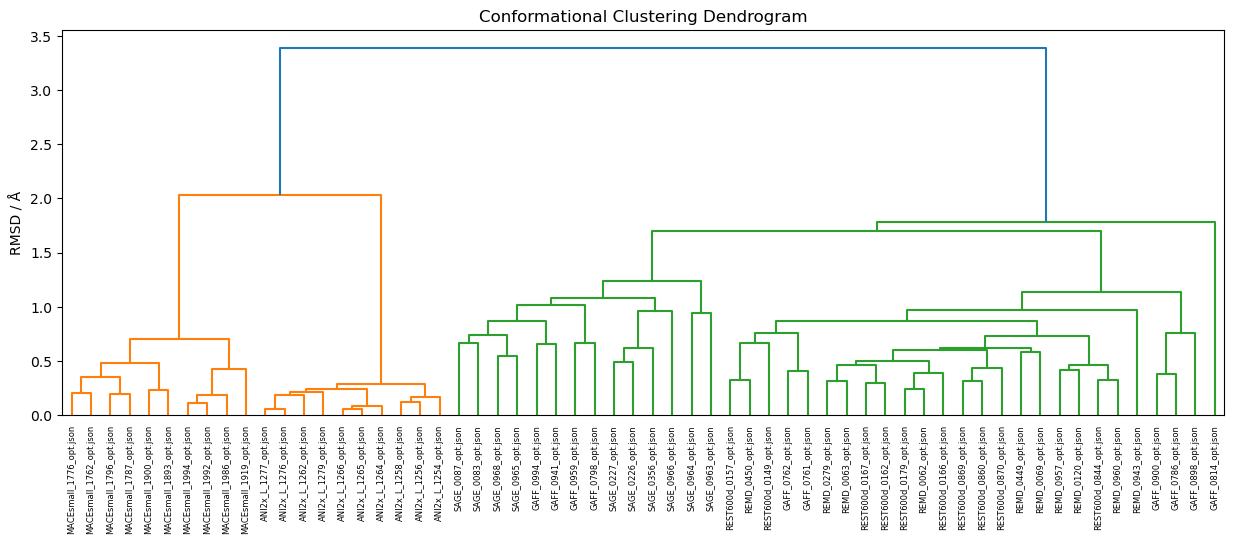

In [13]:
#Perform Hierarchical Clustering
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from scipy.spatial.distance import squareform
from collections import Counter

n_mols = len(mol_list)
rmsd_matrix = np.zeros((n_mols, n_mols))
for i in range(n_mols):
    for j in range(i, n_mols):
        rmsd = rdMolAlign.GetBestRMS(mol_list[i], mol_list[j])
        rmsd_matrix[i, j] = rmsd
        rmsd_matrix[j, i] = rmsd
np.fill_diagonal(rmsd_matrix, 0.0)

condensed_rmsd = squareform(rmsd_matrix)
linkage_matrix = linkage(condensed_rmsd, method='average')

plt.figure(figsize=(15, 5))
dendrogram(linkage_matrix,
           labels=[i.GetProp('_Name') for i in mol_list],
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Conformational Clustering Dendrogram')
plt.ylabel('RMSD / Å')
plt.show()

# Form clusters based on a distance cutoff and reassign clusters based on size
cutoff = 1.5  # RMSD cutoff in Angstroms
cluster_labels = fcluster(linkage_matrix, cutoff, criterion='distance')
cluster_sizes = Counter(cluster_labels)
sorted_clusters = sorted(cluster_sizes.items(), key=lambda item: item[1], reverse=True)
mapping = {old_label: new_label for new_label, (old_label, size) in enumerate(sorted_clusters, 1)}
reassigned_labels = np.array([mapping[label] for label in cluster_labels])
for mol, cluster in zip(mol_list, reassigned_labels):
    mol.SetProp('conf. cluster', str(cluster))

In [14]:
mol_bioactive = Chem.SDMolSupplier('bioactive_min.sdf', removeHs=False)[0]
#
for mol in mol_list:
    rmsd = rdMolAlign.GetBestRMS(mol, mol_bioactive)
    mol.SetProp('RMSD_to_bioactive', str(rmsd))

In [15]:
df = pd.read_csv('all_energy_comparison.csv')
for mol in mol_list:
    name = mol.GetProp('_Name')
    cluster = mol.GetProp('conf. cluster')
    rmsd_to_bioactive = mol.GetProp('RMSD_to_bioactive')
    df.loc[df['filename'] == name, 'RMSD_to_bioactive'] = float(rmsd_to_bioactive)
    df.loc[df['filename'] == name, 'conf. cluster'] = 'cluster_' + str(cluster)
#
df.sort_values(by=['conf. cluster', 'DFT_spe_Energy (+ CPCM) / kcal/mol'], inplace=True)
df.to_csv('all_energy_comparison_with_clusters.csv', index=False)

<Axes: xlabel='RMSD_to_bioactive', ylabel='DFT_spe_Energy (+ CPCM) / kcal/mol'>

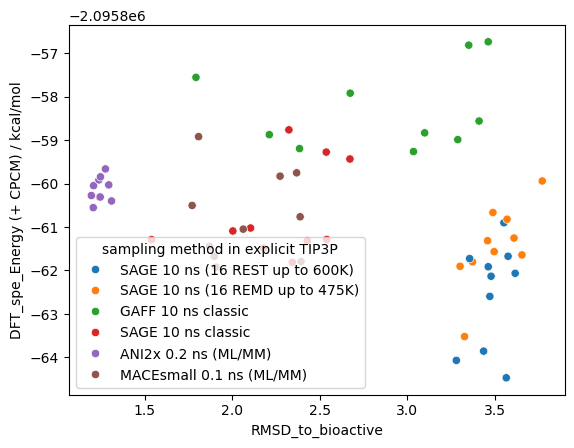

In [16]:
sns.scatterplot(data=df, x='RMSD_to_bioactive', y='DFT_spe_Energy (+ CPCM) / kcal/mol', hue='sampling method in explicit TIP3P')

<Axes: xlabel='RMSD_to_bioactive', ylabel='DFT_spe_Energy (+ CPCM) / kcal/mol'>

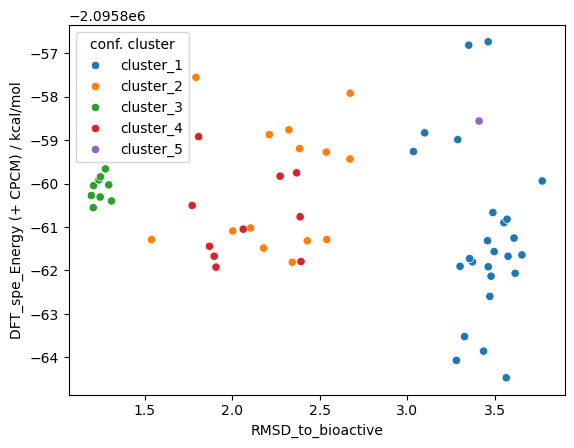

In [17]:
sns.scatterplot(data=df, x='RMSD_to_bioactive', y='DFT_spe_Energy (+ CPCM) / kcal/mol', hue='conf. cluster')

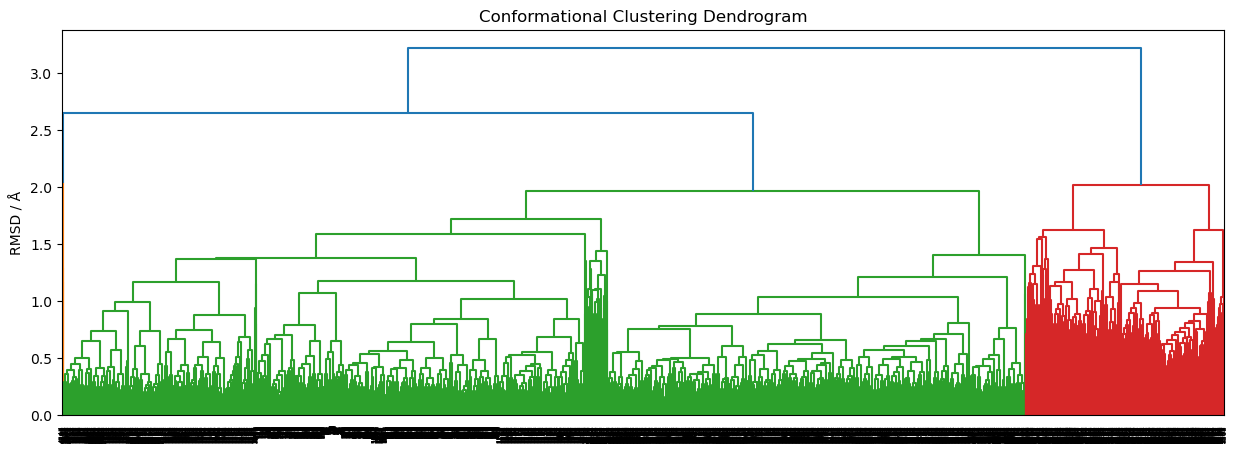

In [ ]:
df = pd.read_csv('top_5000_xtb_energies.csv')
#
mol_list = []
for filename in os.listdir('XTB_opt'):
    if filename in df['filename'].to_list():
        xyzname = filename.split('.')[0] + '.xyz'
        filepath = os.path.join('XTB_opt', xyzname)
        mol = Chem.MolFromXYZFile(filepath)
        rdDetermineBonds.DetermineBonds(mol, charge=0)
        mol = Chem.RemoveHs(mol)
        mol.SetProp('_Name', filename)
        mol_list.append(mol)

n_mols = len(mol_list)
rmsd_matrix = np.zeros((n_mols, n_mols))
for i in range(n_mols):
    for j in range(i, n_mols):
        rmsd = rdMolAlign.GetBestRMS(mol_list[i], mol_list[j])
        rmsd_matrix[i, j] = rmsd
        rmsd_matrix[j, i] = rmsd
np.fill_diagonal(rmsd_matrix, 0.0)

condensed_rmsd = squareform(rmsd_matrix)
linkage_matrix = linkage(condensed_rmsd, method='average')

plt.figure(figsize=(15, 5))
dendrogram(linkage_matrix,
           #labels=[i.GetProp('_Name') for i in mol_list],
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Conformational Clustering Dendrogram')
plt.ylabel('RMSD / Å')
plt.show()

# Form clusters based on a distance cutoff and reassign clusters based on size
cutoff = 2.0
cluster_labels = fcluster(linkage_matrix, cutoff, criterion='distance')
cluster_sizes = Counter(cluster_labels)
sorted_clusters = sorted(cluster_sizes.items(), key=lambda item: item[1], reverse=True)
mapping = {old_label: new_label for new_label, (old_label, size) in enumerate(sorted_clusters, 1)}
reassigned_labels = np.array([mapping[label] for label in cluster_labels])
for mol, cluster in zip(mol_list, reassigned_labels):
    mol.SetProp('cluster', str(cluster))